# Face recognition

In [131]:
from fastai.vision import *
from kgl_deepfake.nb_00 import *
from IPython.display import HTML

### Data

In [2]:
SOURCE = Path('../data/dfdc_train_part_11/')

In [133]:
fnames = get_files(SOURCE, extensions=['.mp4'])

In [134]:
HTML(html_vid(fnames[105]))

### Extracting frames from a video

According to most notebooks that are on Kaggle, `cv2` seems like the go-to library for this.

In [11]:
fname = fnames[105]

In [57]:
capture = cv2.VideoCapture(str(fname))

The number of frames in this video.

In [58]:
nframe = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
nframe

301

Read a frame, which is an image.

In [73]:
ret, image = capture.retrieve()

In [74]:
ret

True

Get proper colours for the image.

In [75]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [76]:
type(image), image.shape

(numpy.ndarray, (720, 1280, 3))

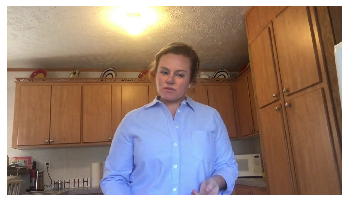

In [77]:
plt.imshow(image); plt.axis('off');
# show_image(tensor(image).permute(2, 0, 1));

When you are finished with the video capture,

In [120]:
capture.release()

According to [Video Speed Test notebook](https://www.kaggle.com/humananalog/video-speed-test), if we only want a selection of frames, it is still faster to loop through all the frames and just keeping the frames we want.  Like this:

In [79]:
frames = []
for i in range(nframe):
    if keep_frame(i):
        ret, frame = capture.retrieve()
        frames.append(frame)        

### Extracting faces using MesoNet paper's code

Here, code from the MesoNet paper's [git repo](https://github.com/DariusAf/MesoNet.git) is used to extract faces from a video.  Install the following packages if you haven't already.

```
brew install ffmpeg
brew install cmake
pip install face_recongnition
pip install imageio-ffmpeg
```

In [41]:
#export
import imageio
import face_recognition

Clone the git repo and append its root to `sys.path` 

In [42]:
#export
SRC_MESONET = Path('/Users/jack/git_repos/MesoNet')
sys.path.append(str(SRC_MESONET))

In [124]:
get_files(SRC_MESONET, extensions=['.py'])

[PosixPath('/Users/jack/git_repos/MesoNet/classifiers.py'),
 PosixPath('/Users/jack/git_repos/MesoNet/example.py'),
 PosixPath('/Users/jack/git_repos/MesoNet/pipeline.py')]

In [125]:
#export
import pipeline as mesopipe

Let's try on an mp4 file.

In [47]:
%%time
ffinder = mesopipe.FaceFinder(fnames[5])

CPU times: user 3.89 s, sys: 207 ms, total: 4.09 s
Wall time: 4.13 s


In [68]:
%%time
ffinder.find_faces(resize=0.8)

/Users/jack/anaconda3/envs/fastai_dev/lib/python3.7/site-packages/scipy/ndimage/interpolation.py:611: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


Face extraction report of not_found : 0
Face extraction report of no_face : 0
CPU times: user 4min 8s, sys: 31.6 s, total: 4min 40s
Wall time: 3min 7s


0

Plot every 10th face.

In [115]:
idxs = list(ffinder.faces.keys())[::10]
len(idxs)

30

In [126]:
#export
def show_faces(face_finder:mesopipe.FaceFinder, idxs):
    ncols = 4
    nrows = int((len(idxs) - 1) / ncols) + 1
    _, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(18, 4*nrows))
    for idx, ax in itertools.zip_longest(idxs, axs.flatten()):
        if idx:
            img = np.array(face_finder.get_aligned_face(idx))
            ax.imshow(img); ax.set_title(idx)
        ax.axis('off')

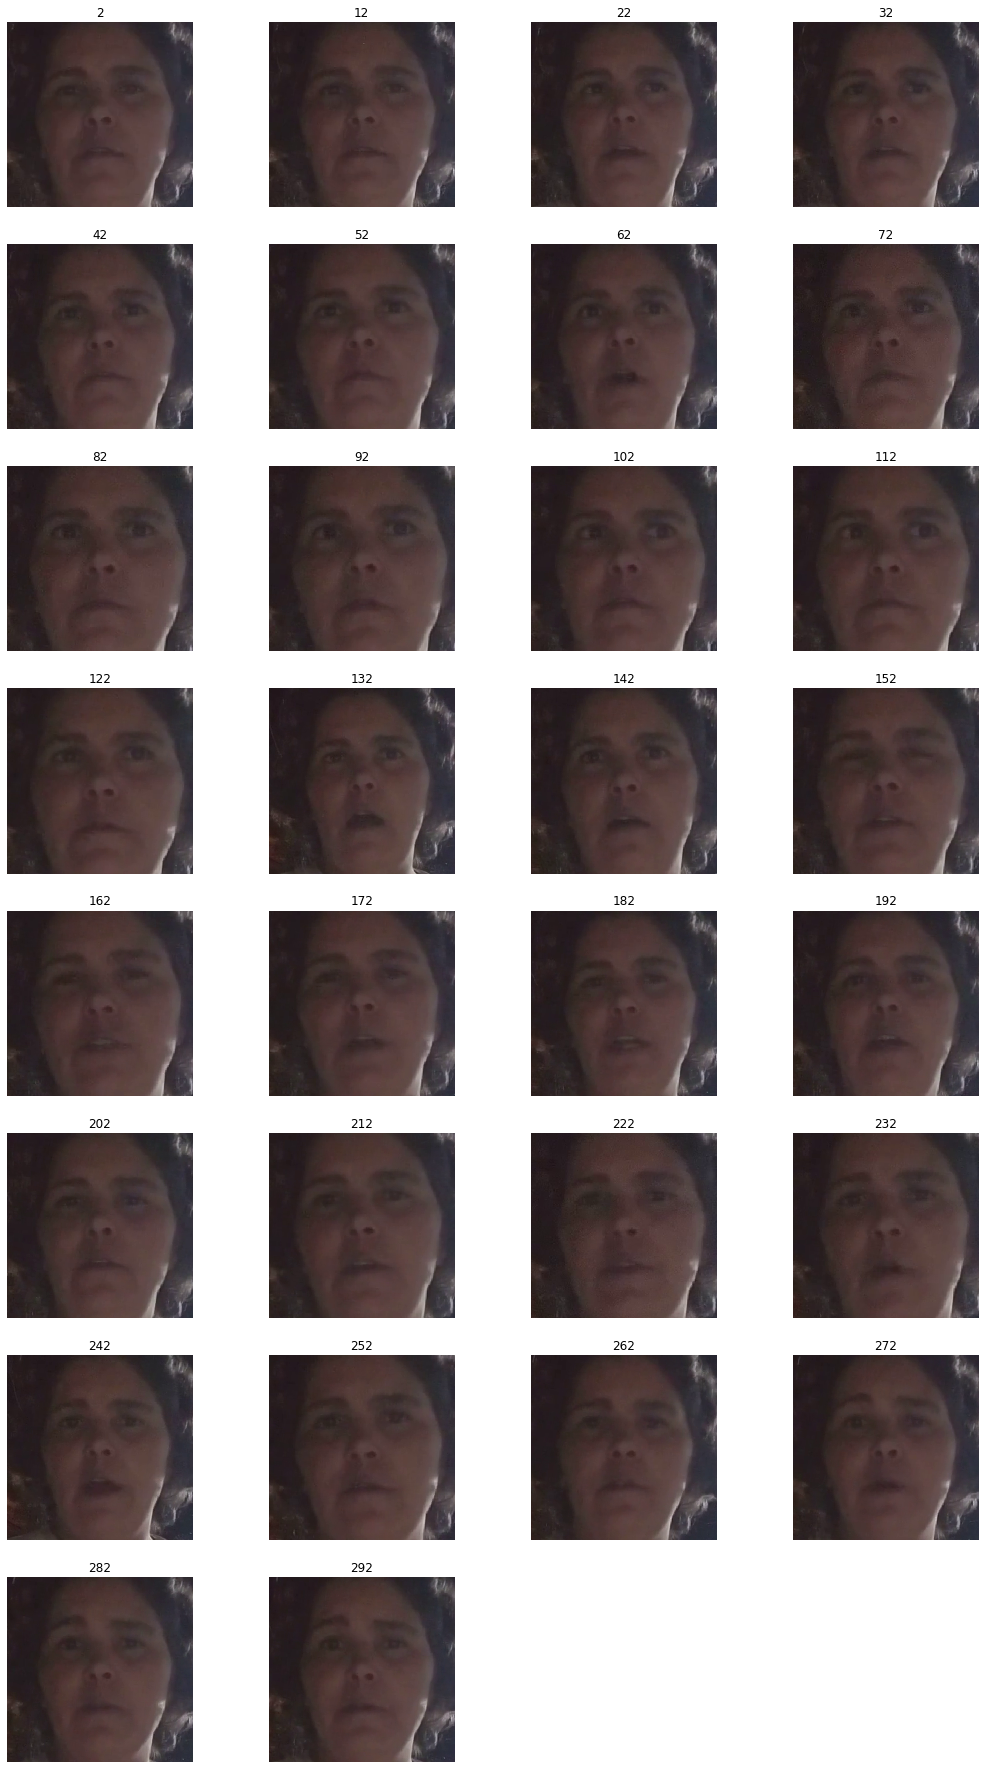

In [122]:
show_faces(ffinder, idxs)

Try another mp4 file.

In [102]:
ffinder1 = mesopipe.FaceFinder(fnames[105])

In [103]:
%%time
ffinder1.find_faces()

/Users/jack/anaconda3/envs/fastai_dev/lib/python3.7/site-packages/scipy/ndimage/interpolation.py:611: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


Face extraction report of not_found : 0
Face extraction report of no_face : 0
CPU times: user 50.8 s, sys: 3.14 s, total: 53.9 s
Wall time: 25.8 s


0

In [111]:
idxs = list(ffinder1.faces.keys())[::10]
len(idxs)

31

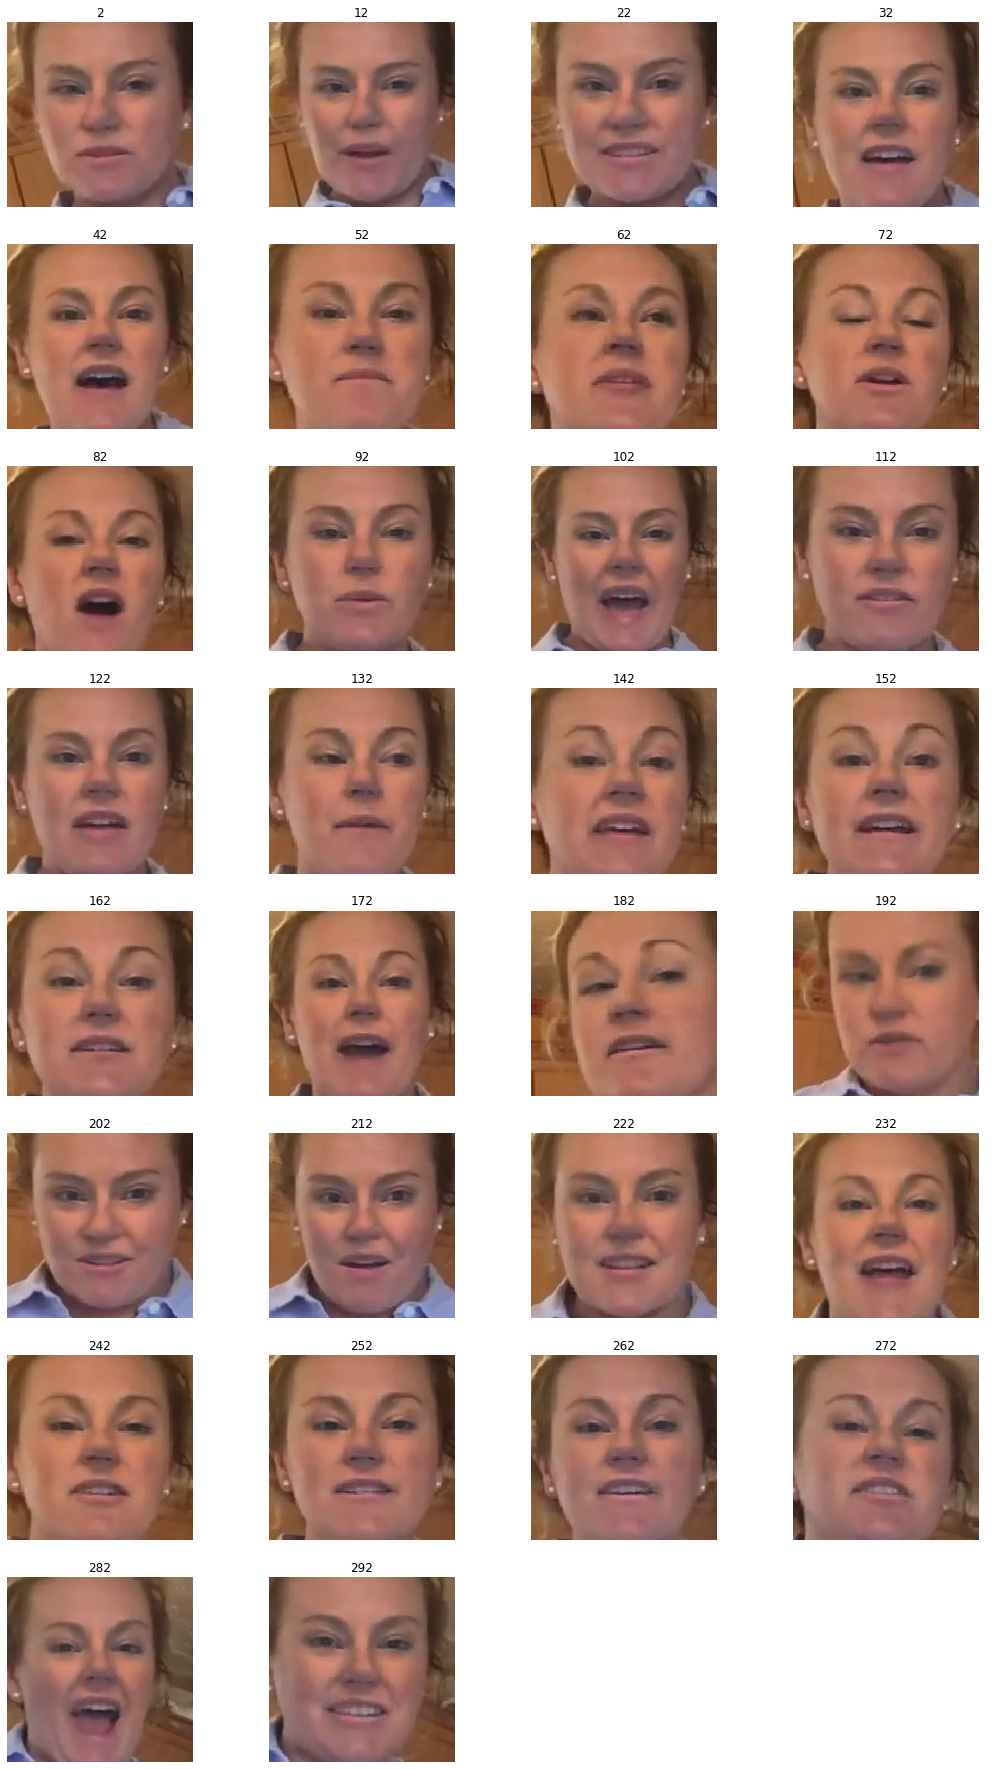

In [123]:
show_faces(ffinder1, idxs)

### Extracting faces using *facenet-pytorch*

The use of [Facenet-pytorch](https://github.com/timesler/facenet-pytorch) for face detection is illustrated well in the [Comparison of Face Detection Packages](https://www.kaggle.com/timesler/comparison-of-face-detection-packages) Kaggle notebook.

In [84]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [132]:
from facenet_pytorch import MTCNN

This creates a face detector.  

In [106]:
detector = MTCNN(device=device, post_process=False)

You can call it with a `PIL.Image.Image` object, and it will return the tensor of an image of a face.

In [121]:
face = detector(PIL.Image.fromarray(image))

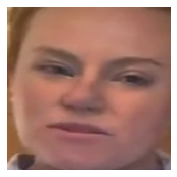

In [122]:
show_image(face.int());

You can also call it with a list of `PIL.Image.Image` objects, and it will return a list of tensors, each being a detected face from each image.

In [125]:
faces = detector(2 * [PIL.Image.fromarray(image)])

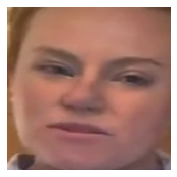

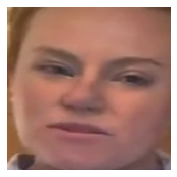

In [126]:
for f in faces: show_image(f.int())

When you're done with the face detector,

In [128]:
del detector
torch.cuda.empty_cache()

# - fin

In [129]:
from nbdev.export import *

In [130]:
notebook2script()

Converted 00_lookatdata.ipynb.
This cell doesn't have an export destination and was ignored:
e
This cell doesn't have an export destination and was ignored:
e
This cell doesn't have an export destination and was ignored:
e
This cell doesn't have an export destination and was ignored:
e
This cell doesn't have an export destination and was ignored:
e
This cell doesn't have an export destination and was ignored:
e
Converted 01_face_recog.ipynb.
Converted 03_mesonet.ipynb.
